# Datasets

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import nntools.dataset as D

Missing MLFLOW module


/home/clement/miniconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/clement/miniconda3/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail19maybe_wrap_dim_slowEllb
  warn(f"Failed to load image Python extension: {e}")


## Only images

/home/clement/Documents/phd/NNTools/nntools/utils/plotting.py:132: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/clement/Documents/phd/NNTools/nntools/dataset/abstract_image_dataset.py:370: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


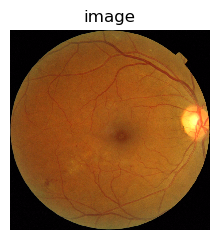

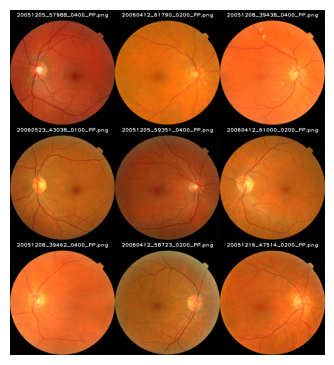

In [3]:
folder = '../../DR/MessidorAnnotation/img/images/'
dataset = D.ImageDataset(folder, shape=(1024, 1024), keep_size_ratio=True, recursive_loading=True)
dataset.plot(0, fig_size=0.25)
mosaic = dataset.get_mosaic(shuffle=True, show=True, save=False, n_row=3, n_col=3, fig_size=0.25, add_labels=True)

## Multiple images at once

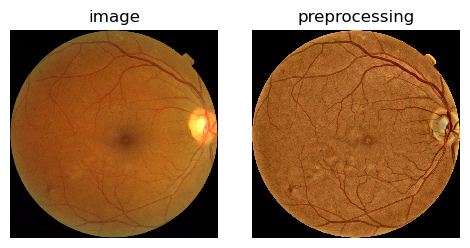

In [4]:
folder1 = '../../DR/MessidorAnnotation/img/images/'
folder2 = '../../DR/MessidorAnnotation/img/preprocessings/'
folders = {'image':folder1, 'preprocessing':folder2}
dataset = D.MultiImageDataset(folders, shape=(1024, 1024), keep_size_ratio=True, recursive_loading=True)
dataset.plot(0, fig_size=0.5)

## Image Classification

/home/clement/Documents/phd/NNTools/nntools/utils/plotting.py:132: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Class for associated image is 3


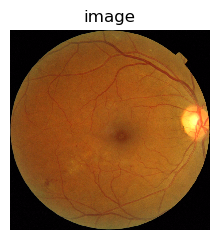

In [5]:
csv_filepath = '../../DR/MessidorAnnotation/diagnostic.xls'
dataset = D.ClassificationDataset(folder, shape=(1024, 1024), 
                                  label_filepath=csv_filepath,
                                  file_column='name', gt_column='retinopathy',
                                  keep_size_ratio=True, recursive_loading=True)

dataset.plot(0, fig_size=0.25)
print(f"Class for associated image is {dataset[0]['retinopathy']}")

## Image Segmentation

/home/clement/Documents/phd/NNTools/nntools/utils/plotting.py:132: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


dict_keys(['image', 'Vessels', 'OpticDisk'])

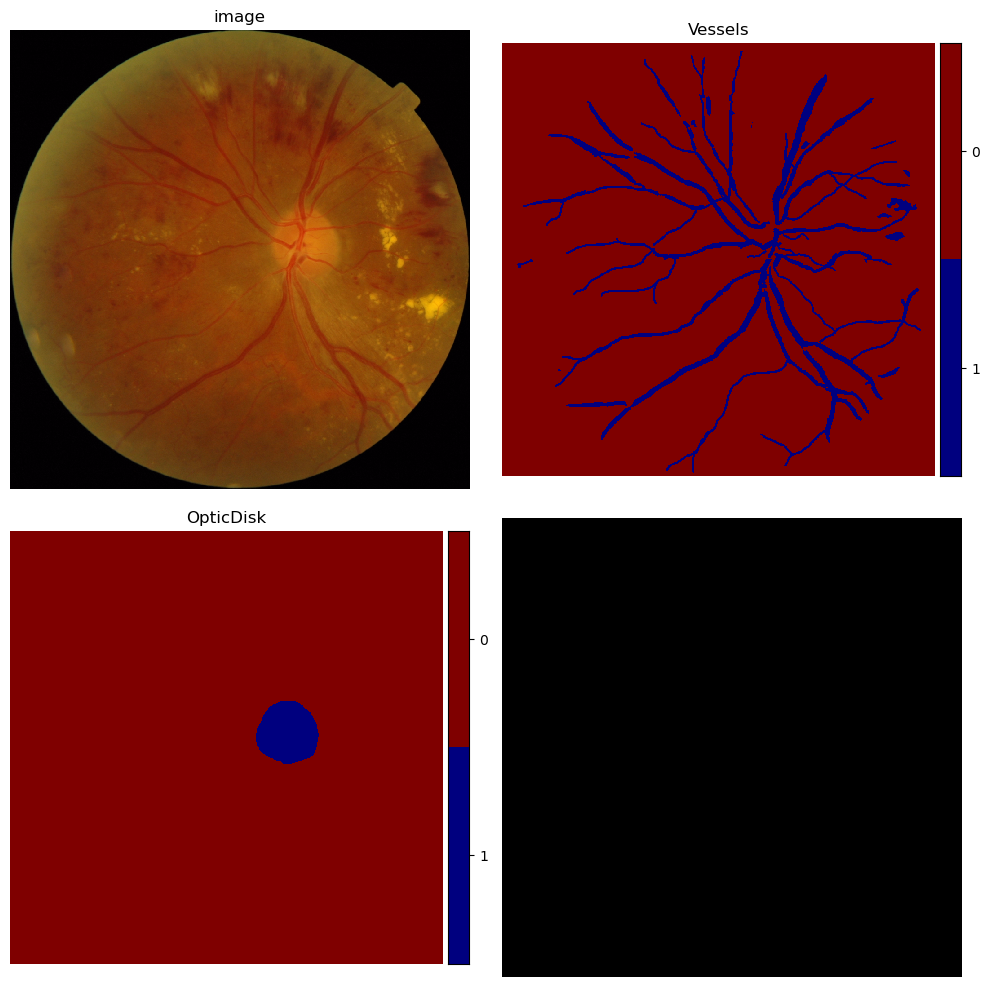

In [9]:
vessels_paths = '../../DR/MessidorAnnotation/biomarkers/Vessels/Vessels - Uncertain/'
optic_disk_path = '../../DR/MessidorAnnotation/biomarkers/Normal/Disk/'
masks_url = {'Vessels':vessels_paths, 'OpticDisk':optic_disk_path}

dataset = D.SegmentationDataset(folder, shape=(1024, 1024), mask_url=masks_url, keep_size_ratio=True, recursive_loading=True)
dataset.plot(2)
dataset[0].keys()

## Preprocess data

/home/clement/Documents/phd/NNTools/nntools/utils/plotting.py:132: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


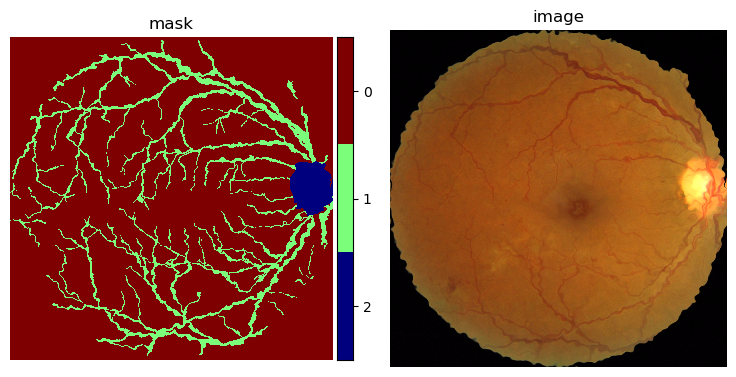

In [14]:
import numpy as np
import albumentations as A
@D.nntools_wrapper
def merge_labels_to_multiclass(Vessels, OpticDisk):
    mask = np.zeros_like(Vessels)
    mask[Vessels == 1] = 1
    mask[OpticDisk == 1] = 2
    return {'mask':mask}


composer = D.Composition()
composer.add(merge_labels_to_multiclass)

data_aug = A.Compose([A.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)]) # Add all augmentation following Albumentations logic
composer.add(data_aug) 
dataset.composer = composer
dataset.plot(0, fig_size=0.75)
